<a href="https://colab.research.google.com/github/IonaSantana/Artificial-Intelligence/blob/main/Projects/Classicos/Titanic/Titanic_Survive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
people = pd.read_csv("/content/drive/MyDrive/Titanic/train.csv")

In [4]:
people.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
people.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
len(people)

891

In [7]:
people = people.drop(['Cabin'],axis = 1)

In [8]:
def pre_process(df):
  df['Sex'] = np.where(df['Sex'] == 'male', 0, 1)
  df['Embarked'] = np.where(df['Embarked']== 'S', 0, df['Embarked'])
  df['Embarked'] = np.where(df['Embarked']== 'C', 1, df['Embarked'])
  df['Embarked'] = np.where(df['Embarked']== 'Q', 2, df['Embarked'])

  return df

In [9]:
people = people.dropna(subset=['Embarked'])

In [10]:
people['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [11]:
people = pre_process(people)

In [12]:
people['Embarked'].unique()

array([0, 1, 2], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc06db5a450>,
      dtype=object)

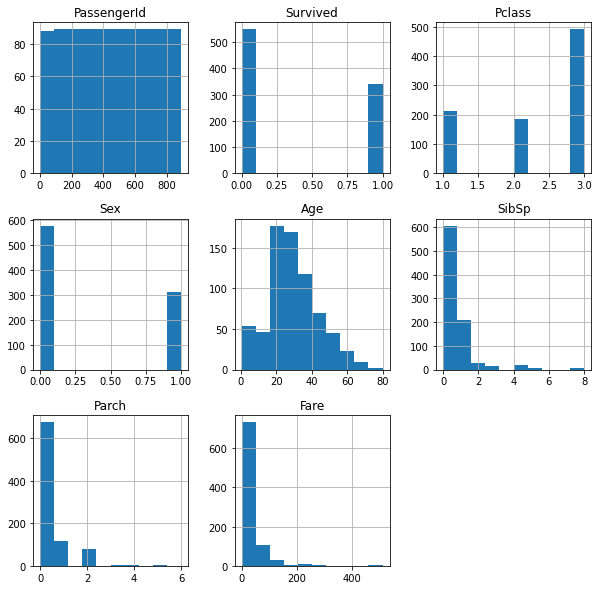

In [13]:
people.hist(figsize=[10,10])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc06cf7c250>,
      dtype=object)

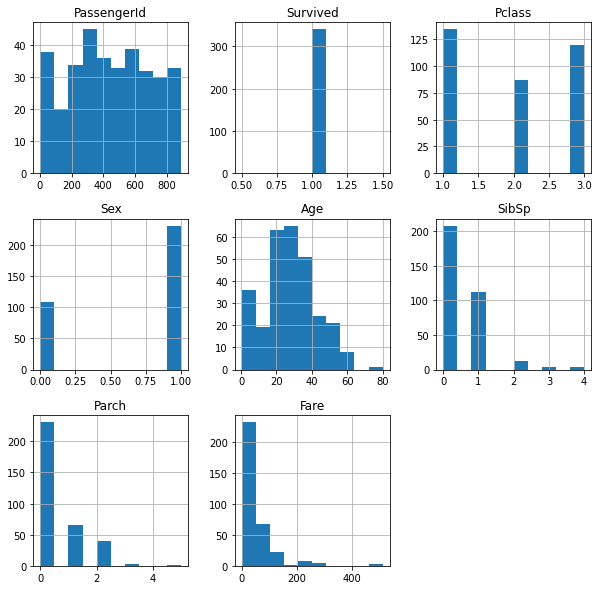

In [14]:
people_1 = people[people['Survived'] == 1]
people_1.hist(figsize=[10,10])

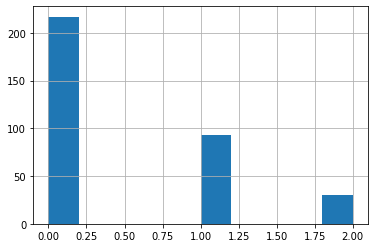

In [15]:
people_1['Embarked'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc06ce68c90>,
      dtype=object)

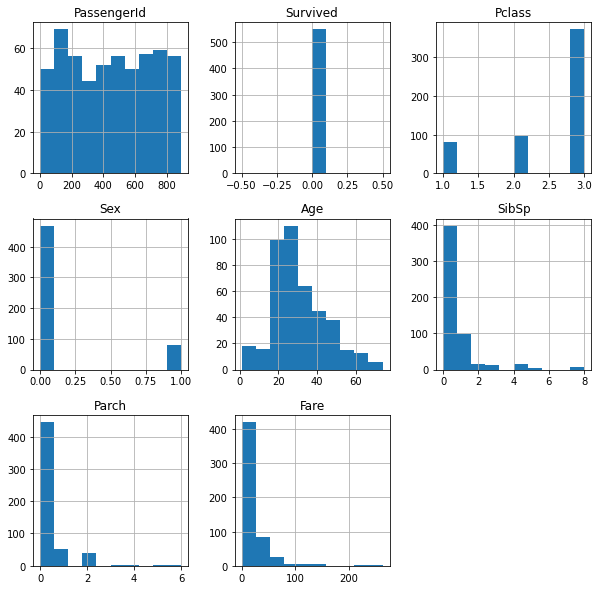

In [16]:
people_0 = people[people['Survived'] == 0]
people_0.hist(figsize=[10,10])

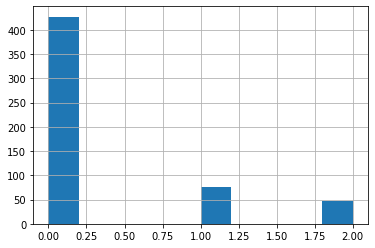

In [17]:
people_0['Embarked'].hist()

muita gente P3 não sobreviveu, junto com SibSp perto de 0, mas tem bastante sobrevivente com 0, e sobrevivendo com 1. E sex == 0 (homens) e Parch == 0

# Árvore de decisão, usando Pclass, Sex, SibSp e Parch
Talvez embarked, pois tem variedade quando tem sobreviventes

In [48]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [50]:
X_train, X_test, y_train, y_test = train_test_split(people[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']], people['Survived'], test_size=0.3, random_state=3)

In [51]:
people.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [52]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [53]:
y = clf.predict(X_test)

In [54]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y))

DecisionTrees's Accuracy:  0.7565543071161048


In [55]:
resp = pd.read_csv("/content/drive/MyDrive/Titanic/test.csv")

In [56]:
resp = pre_process(resp)

In [59]:
X_test_k = resp[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']] #sem o embarked primeiro

In [60]:
y_k = clf.predict(X_test_k)

In [61]:
df = pd.DataFrame(y_k)

In [62]:
cols = ['PassengerId']
resp = resp[cols]
resp['Survived'] = df[0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
resp

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [64]:
resp.to_csv('cade.csv',index=False)